In [1]:
from zipfile import ZipFile

file_name = "/content/drive/My Drive/Colab Notebooks/gen-2-ai-force-challenge-1.zip"
with ZipFile(file_name,'r') as zip:
  # zip.printdir()
  zip.extractall()
  print('done')


done


In [2]:
import numpy as np
import cv2 as cv
from keras.preprocessing.image import ImageDataGenerator
import glob
from sklearn.model_selection import train_test_split
np.random.seed(2)
train_set = []
labels = []
for i in range(10):
  Str = "/content/data_train_mnist/data_train_mnist/"
  
  Str = Str + str(i) +"*.jpg"
  print(Str)
  filenames = glob.glob("/content/data_train_mnist/data_train_mnist/"+str(i)+"/*.jpg")
  images = [cv.imread(img) for img in filenames]

  for img in images:
      img_gray = np.array(cv.cvtColor(img,cv.COLOR_BGR2GRAY))
      train_set.append(img_gray)
      labels.append(i)
train_set = np.array(train_set)
# id = np.random.permutation(59230)
x=[]
y=[]
import matplotlib
import matplotlib.pyplot as plt
cnt = 0;
for i in range(59230):
  x.append(train_set[i])
  y.append(labels[i])
  
x = np.array(x)/255.0
x = x.reshape(-1,28,28,1)
# print(x[0])
y = np.array(y)
from keras.utils import to_categorical
y = to_categorical(y)
print(y)

X_train, X_val, Y_train, Y_val = train_test_split(x, y, test_size = 0.1,
                                                  random_state=2)
print(X_train.shape, Y_train.shape)
data_gen = ImageDataGenerator(zoom_range = 0.1,
                              width_shift_range = 0.2,height_shift_range = 0.2,
                              rotation_range = 10)

data_gen.fit(X_train)


Using TensorFlow backend.


/content/data_train_mnist/data_train_mnist/0*.jpg
/content/data_train_mnist/data_train_mnist/1*.jpg
/content/data_train_mnist/data_train_mnist/2*.jpg
/content/data_train_mnist/data_train_mnist/3*.jpg
/content/data_train_mnist/data_train_mnist/4*.jpg
/content/data_train_mnist/data_train_mnist/5*.jpg
/content/data_train_mnist/data_train_mnist/6*.jpg
/content/data_train_mnist/data_train_mnist/7*.jpg
/content/data_train_mnist/data_train_mnist/8*.jpg
/content/data_train_mnist/data_train_mnist/9*.jpg
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
(53307, 28, 28, 1) (53307, 10)


In [0]:
from keras.models import Sequential
from keras.callbacks import  ReduceLROnPlateau
from keras.layers import Conv2D,MaxPooling2D,Dropout,Dense,Flatten
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping

earlystopper = EarlyStopping(monitor='val_loss', min_delta=0,
                             patience=1, verbose=1, mode='auto')
model = Sequential()
model.add(Conv2D(filters = 32,kernel_size=(3,3),padding = 'Same' ,activation='relu',input_shape = (28,28,1)))
# model.add(Conv2D(filters = 32,kernel_size=(5,5),padding = 'Same',activation='relu' ))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(filters = 64, kernel_size=(3,3),padding = 'Same',activation = 'relu'))
# model.add(Conv2D(filters = 64, kernel_size=(3,3),activation = 'relu',padding = 'Same' ))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.2))
# model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(units = 1024,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.5))
# model.add(Dense(units=1024,activation='relu'))
# model.add(Dropout(0.5))

model.add(Dense(units = 10,activation='softmax'))
# model.add(Dropout(0.15))
# optimizer = 
model.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')
# model.fit(x,y,epochs=10,batch_size=1000)

model.fit_generator(data_gen.flow(X_train,Y_train,batch_size=200),
                    steps_per_epoch=len(X_train)/200,
                    epochs = 40,
                    validation_data = (X_val,Y_val)
                    )


Epoch 1/40
267/266 [==============================] - 21s 77ms/step - loss: 0.6797 - acc: 0.7699 - val_loss: 0.1097 - val_acc: 0.9681
Epoch 2/40
267/266 [==============================] - 20s 73ms/step - loss: 0.1991 - acc: 0.9390 - val_loss: 0.0566 - val_acc: 0.9818
Epoch 3/40
267/266 [==============================] - 20s 73ms/step - loss: 0.1506 - acc: 0.9535 - val_loss: 0.0527 - val_acc: 0.9829
Epoch 4/40
267/266 [==============================] - 19s 72ms/step - loss: 0.1222 - acc: 0.9634 - val_loss: 0.0383 - val_acc: 0.9882
Epoch 5/40
267/266 [==============================] - 19s 72ms/step - loss: 0.1054 - acc: 0.9689 - val_loss: 0.0346 - val_acc: 0.9885
Epoch 6/40
267/266 [==============================] - 19s 72ms/step - loss: 0.0995 - acc: 0.9697 - val_loss: 0.0356 - val_acc: 0.9878
Epoch 7/40
267/266 [==============================] - 19s 72ms/step - loss: 0.0891 - acc: 0.9732 - val_loss: 0.0402 - val_acc: 0.9873
Epoch 8/40
267/266 [==============================] - 19s 72ms

/content/test_public/test_public/155e55ca-e4e2-4ba9-bbc9-6f3c23d1b68a.jpg
155e55ca-e4e2-4ba9-bbc9-6f3c23d1b68a.jpg
(701, 28, 28, 1)
                                      ImageID  Label
0    155e55ca-e4e2-4ba9-bbc9-6f3c23d1b68a.jpg      7
1    1cd87f48-a754-4dd5-b4e7-0f31a7d29d6a.jpg      7
2    2a31963e-1ba8-4cea-8a94-7d77458f7c72.jpg      9
3    bdb62486-b1e1-4c24-99f5-d8425297b8c1.jpg      4
4    11eab721-5845-479e-90fe-c2f73b2a2a3b.jpg      7
..                                        ...    ...
696  9c8dac7b-8acf-4c97-8729-01fa8751a436.jpg      5
697  31607b18-57a6-4a16-b606-91312ac2327e.jpg      0
698  e4558931-ec9e-4c6c-bf88-d238f1493bc5.jpg      1
699  d7f7e915-f370-45a0-9146-1976dc860a68.jpg      9
700  8d61bfa0-e532-419e-b181-9c233180889c.jpg      2

[701 rows x 2 columns]
                                      ImageID  Label
0    155e55ca-e4e2-4ba9-bbc9-6f3c23d1b68a.jpg      7
1    1cd87f48-a754-4dd5-b4e7-0f31a7d29d6a.jpg      7
2    2a31963e-1ba8-4cea-8a94-7d77458f7c72.jpg    

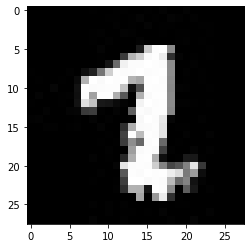

a4019f3d-577b-4b9e-b637-00908e539766.jpg 3 5


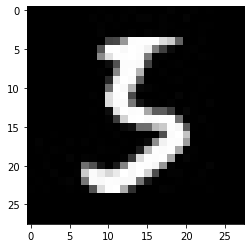

09b42a5e-89ad-4a5d-8d29-bfabf0926d14.jpg 8 2


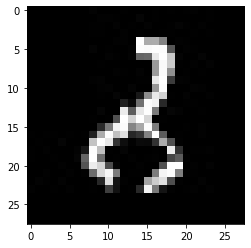

762419d0-362b-49bc-9d7e-c51a7c704c01.jpg 9 4


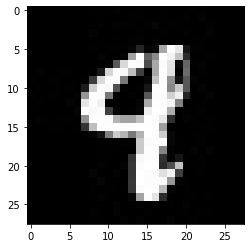

4


In [0]:
import numpy as np
import cv2 as cv
import glob
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
test = []
filenames = glob.glob("/content/test_public/test_public/*.jpg")
# filenames.sort()
images = [cv.imread(img) for img in filenames]
id= []
name = [im for im in filenames]
print(name[0])
print(name[0].split('/')[-1])
ten = []
for t in name:
  ten.append(t.split('/')[-1])
pixel = {}
i = 0;
for img in images:
    
    img_gray = np.array(cv.cvtColor(img,cv.COLOR_BGR2GRAY))
    test.append(img_gray)
    pixel[ten[i]] = img_gray
    i+=1
    # break
test = np.array(test)/255.0
test = test.reshape(-1,28,28,1)
print(test.shape)
pred = model.predict(test)
pred = np.argmax(pred,axis = 1)
predict = {}

for i in range(701):
  predict[ten[i]] = pred[i]

import pandas as pd
sub = pd.read_csv("/content/sampleSubmission3 (1).csv")
print(sub)
pre = sub['Label']
label = []
for i in sub['ImageID']:
  label.append(predict[i])

dict = {'ImageID': sub['ImageID'], 'Label': label}  
df = pd.DataFrame(dict) 
df.to_csv('sampleSubmission4.csv',index=False) 


s = pd.read_csv("sampleSubmission4.csv")
print(s)
cnt =0
now = s['Label']
name = s['ImageID']
for i in range(len(now)):
  if now[i]!= pre[i]:
    cnt+=1
    print(name[i],now[i],pre[i])
    plt.imshow(pixel[name[i]].reshape(28,28),cmap='gray')
    plt.show()
print(cnt)

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dropout,Dense,Flatten

model = Sequential()
model.add(Conv2D(filters = ,kernel_size=(3,3),activation='relu',input_shape = (28,28,1)))
